# Step Testing

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from tclab import TCLab, clock, Historian, Plotter

Run the next cell if you only want to simulate TCLab

In [ ]:
from tclab import setup
TCLab = setup(connected=False, speedup=20)

## Executing the Step Test

### Verify an Initial Steady State

A step test assumes the system is initially at steady state. In the case of the Temperature Control Lab, the initial steady with no power input would be room temperature. It generally takes 10 minutes or more to reach steady state. We'll do a measurement to confirm the initial temperature.

In [ ]:
lab = TCLab()
print(lab.T1, lab.T1)
lab.close()

TCLab version 1.0.0
Simulated TCLab
20.949499999999997 20.949499999999997
TCLab Model disconnected successfully.


## Conduct the Experiment

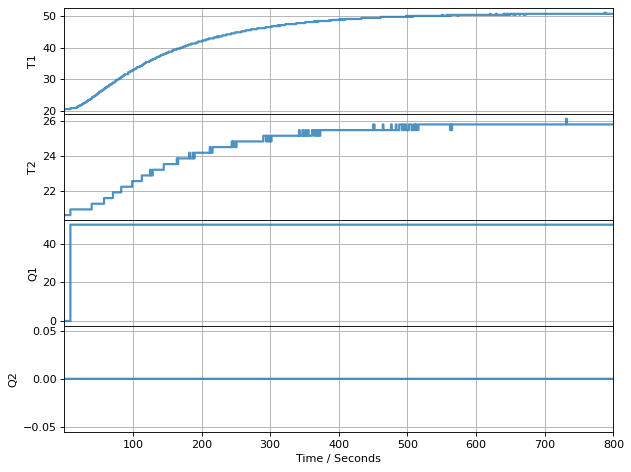

TCLab Model disconnected successfully.


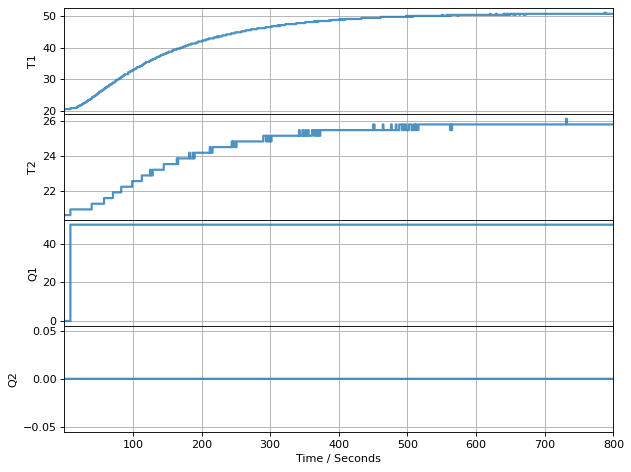

In [ ]:
# experimental parameters
Q1 = 50
tfinal = 800

# perform experiment
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(0)
    for t in clock(tfinal):
        p.update(t)
        lab.Q1(Q1)

## Verify the experimental data

In [ ]:
h.columns

['Time', 'T1', 'T2', 'Q1', 'Q2']

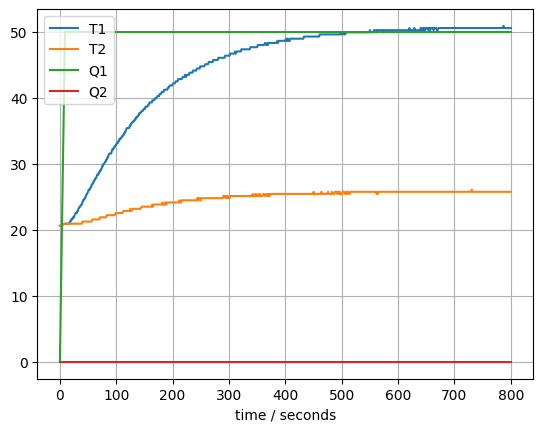

In [ ]:
try:
    t = h.t
    T1 = h.T1
    T2 = h.T2
    Q1 = h.Q1
    Q2 = h.Q2
except:
    t, T1, T2, Q1, Q2 = h.fields
    
plt.plot(t, T1, t, T2, t, Q1, t, Q2)
plt.legend(['T1','T2','Q1','Q2'])
plt.xlabel('time / seconds')
plt.grid()

### Convert to a DataFrame

<Axes: xlabel='Time'>

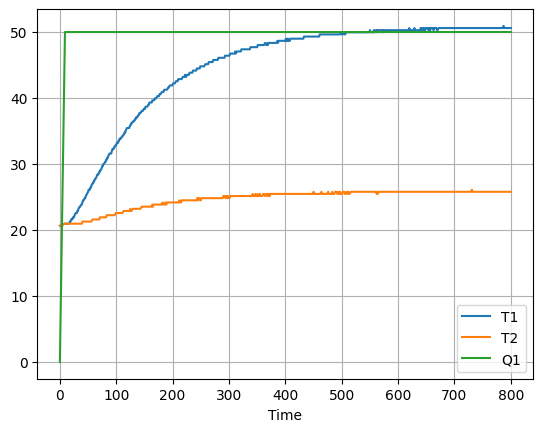

In [ ]:
import pandas as pd

df = pd.DataFrame([t, T1, T2, Q1]).T
df.columns = ['Time', 'T1', 'T2', 'Q1']
df = df.set_index('Time')
df.plot(grid=True)

### Save DataFrame as a .csv file

In [ ]:
df.to_csv('Step_Test_Data.csv')

### Verify the data file

<Axes: xlabel='Time'>

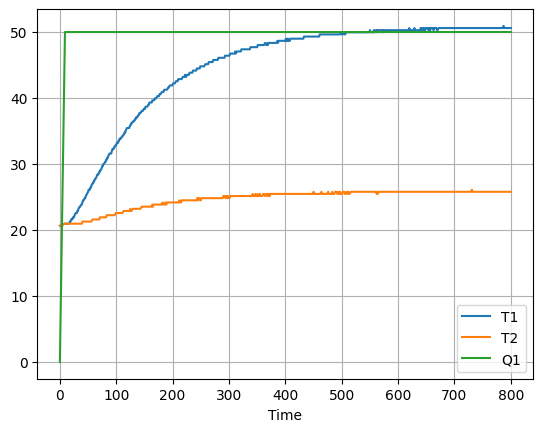

In [ ]:
%matplotlib inline

pd.read_csv('Step_Test_Data.csv').set_index('Time').plot(grid=True)

In [ ]:
df.head()

,T1,T2,Q1
Time,,,
0.00,20.6272,20.6272,0.0
9.00,20.9495,20.9495,50.0
10.00,20.9495,20.9495,50.0
12.01,20.9495,20.9495,50.0
13.00,20.9495,20.9495,50.0


In [ ]:
df.tail()

,T1,T2,Q1
Time,,,
795.01,50.6011,25.784,50.0
796.00,50.6011,25.784,50.0
798.01,50.6011,25.784,50.0
799.01,50.6011,25.784,50.0
800.01,50.6011,25.784,50.0
